#K-Means Clustering

ক্লাস্টারিং এর সহজ মানে হচ্ছে কয়েকটি ভাগে ভাগ করা।


https://realpython.com/k-means-clustering-python/

https://stackabuse.com/k-means-clustering-with-scikit-learn/

https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

https://www.datacamp.com/community/tutorials/k-means-clustering-python

https://www.analyticsvidhya.com/blog/2016/11/an-introduction-to-clustering-and-different-methods-of-clustering/?utm_source=blog&utm_medium=beginners-guide-hierarchical-clustering


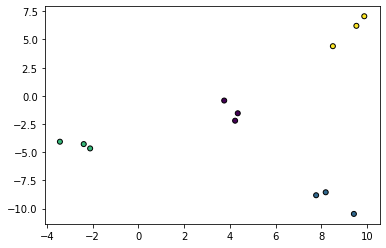

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

features, labels = make_blobs(n_samples=12, centers=4)
plt.scatter(features[:, 0], features[:, 1], marker='o', c=labels, s=25, edgecolor='k')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features

array([[-1.43716721,  0.82855273],
       [-0.45885514, -1.62897948],
       [ 0.75541842, -0.18882732],
       [-1.12980139,  0.73513472],
       [ 0.07431041,  1.10434668],
       [-1.15830592,  0.59308371],
       [ 1.11236706,  1.18368692],
       [ 1.11622818,  0.12043153],
       [ 0.0773793 ,  0.74860208],
       [ 0.24956358, -1.20595847],
       [-0.95316122, -1.62458882],
       [ 1.75202394, -0.66548429]])

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(init="random", n_clusters=3)
kmeans.fit(scaled_features)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [ ]:
print(kmeans.cluster_centers_)
print(kmeans.n_iter_)
print(kmeans.inertia_) # Sum of Squared Error (SSE)

[[ 1.1840094   0.11245171]
 [-0.38748426 -1.48650892]
 [-0.71471696  0.80194399]]
4
5.492674479288284


#ইভালুয়েশান

##Elbow method

[39.99999999999999, 23.901887082186256, 9.733346359060965, 6.120377182592204, 5.324307537397519, 4.245406142465027, 3.1287358618357235, 2.49223979945914, 1.8259720397732588, 1.3549699557432393]


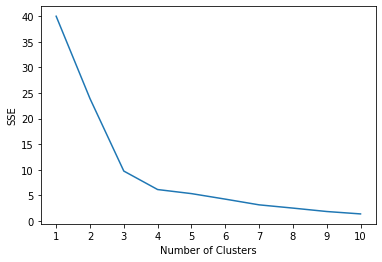

In [ ]:
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, init="random", random_state=42)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)
print(sse)

plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

ModuleNotFoundError: ignored

In [ ]:
!pip install kneed

##সিলুউট কোইফিসিয়েন্ট (Silhouette coefficient)

সিলুউট কোইফিসিয়েন্ট আসলে ক্লাস্টারের সংলগ্নতা এবং বিচ্ছিন্নতা পরিমাপ করে। কথাটা কঠিন লাগছে? সহজে করে বলি, 

সিলুউট কোইফিসিয়েন্ট দুটি জিনিস পরিমাপ করে। 
1. একটি ডেটা তার নিজের ক্লাস্টারের অন্য ডেটার কতটা কাছে আছে 
2. সেই ডেটা অন্য ক্লাস্টারের ডেটা থেকে কত দূরে আছে

**এটি ১ থেকে -১ পর্যন্ত মান দেয়। বেশি হলে বুঝবেন ডেটাগুলো নিজেদের ক্লাস্টারগুলোর কাছাকাছি এবং অন্য ক্লাস্টার থেকে দূরে দূরে রয়েছে।**

লিংক রেফার- 
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html


[0.3565943637143883, 0.4967779785268058, 0.4576105390940578, 0.4093003551771681, 0.3619657178989439, 0.3470635043195453, 0.36608146007909514, 0.3492745244624885, 0.41702644789039844]


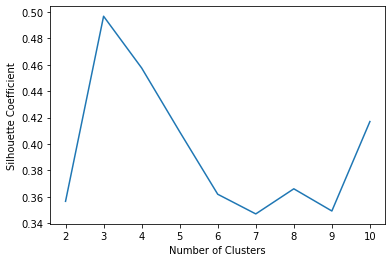

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, init="random", random_state=42)
  kmeans.fit(scaled_features)
  score = silhouette_score(scaled_features, kmeans.labels_)
  silhouette_coefficients.append(score)
print(silhouette_coefficients)

plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

#রেফারেন্স

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster

https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html
